In [1]:
import scipy as sp
import numpy as np
import numpy.linalg as la
from scipy.integrate import odeint
from ipywidgets import interact, fixed
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
def Resp_tempo(x, t, w):

    #Definindo matrizes

    a11 = sp.zeros((4,4))
    a12 = sp.eye((4))
    a21 = sp.array([[alpha/m, 0, 0, 0],[0, alpha/m, 0, 0], [0, 0, delta/I, 0], [0, 0, 0, delta/I]]) 
    a22 = sp.array([[c11/m, 0, c12, 0], [0, c11/m, 0, c12], [c21, 0, c22/I, Ip*w], [0, c21, -Ip*w, c22/I]])
    f=[0,0,0,0,u*w**2*sp.cos(w*t),u*w**2*sp.sin(w*t),(Ip-I)/I*2*w**2*sp.cos(w*t),(Ip-I)/I*2*w**2*sp.sin(w*t)]
    
    #Matriz A
    a = sp.hstack((a11, a12))
    b = sp.hstack((-1*a21, -1*a22)) 
    
    A = sp.vstack((a,b)) 
 
    dxdt = A @ x + f 
    return dxdt


In [17]:
#Eixo
E = 209e9
rho = 7860
l = 10
d = 0.25
ar = sp.pi*d**2/4

In [18]:
#vetor espaco-estado
x=0
y=0
thx=0
thy=0
dx=0
dy=0
dthx=0
dthy=0

z=[x, y, thx, thy, dx, dy, dthx, dthy] #vetor de estado

#tempo
t0=0
tf=100
t=sp.linspace(t0,tf,100*(tf-t0))

In [19]:
#Sistema
m=rho*ar*l
I=m*(d**2/16+l**2/12)
I0=sp.pi*d**4/64
Ip=m*d**2/8
alpha=12*E*I0/l**3
gama= -6*E*I0/l**2
delta=4*E*I0/l
csi=.1
c11=2*csi*sp.sqrt(alpha/m)
c12=0
c21=c12
c22=2*csi*sp.sqrt(delta/I) 
u=1
w = 1

array([ 0.        ,  0.        ,  0.        ,  0.        ,  3.34130604,
        3.34130604,  3.44432779,  6.48121257])

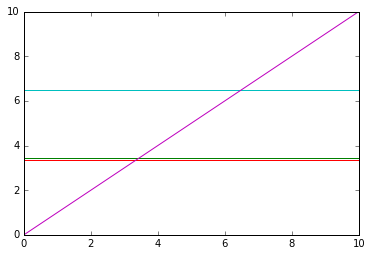

In [32]:
#Diagrama de Campbell
#frequencias naturais
omega = sp.linspace(0,10,500)
fw1 = []
bw1 = []
bw2 = []
fw2 = []


#determinando as interseçoes
for i in omega :
    a11 = sp.zeros((4,4))
    a12 = sp.eye((4))
    a21 = sp.array([[alpha/m, 0, 0, 0],[0, alpha/m, 0, 0], [0, 0, delta/I, 0], [0, 0, 0, delta/I]]) 
    a22 = sp.array([[c11/m, 0, c12, 0], [0, c11/m, 0, c12], [c21, 0, c22/I, Ip*w], [0, c21, -Ip*w, c22/I]])
    f=[0,0,0,0,u*w**2*sp.cos(w*t),u*w**2*sp.sin(w*t),(Ip-I)/I*2*w**2*sp.cos(w*t),(Ip-I)/I*2*w**2*sp.sin(w*t)]
    
    #Matriz A
    a = sp.hstack((a11, a12))
    b = sp.hstack((-1*a21, -1*a22)) 
    
    A = sp.vstack((a,b)) 
    evalues, evects = la.eig(A)
    evalues = sp.sort(evalues.imag)
    wn = (sp.sqrt(evalues)).real
    bw1.append(wn[4])
    bw2.append(wn[5])
    fw1.append(wn[6])
    fw2.append(wn[7])

# desenhando o diagrama de Campbell
plt.plot(omega, bw1)
plt.plot(omega, fw1)
plt.plot(omega, bw2)
plt.plot(omega, fw2)
plt.plot(omega, omega)

wn

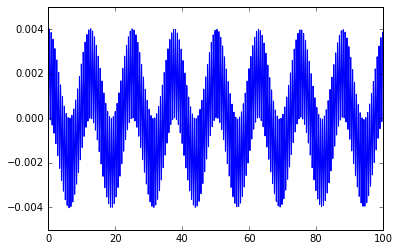

In [21]:
#para frequencia abaixo da natural
w1=.5
sol=odeint(Resp_tempo, z, t, args=(w1,))

plt.plot(t,sol[:,0])

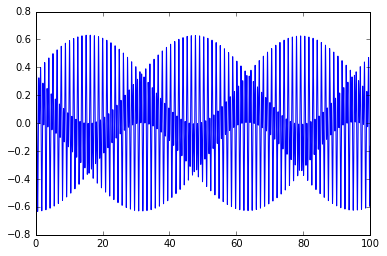

In [67]:
#para frequencia abaixo da natural
w2=5
sol=odeint(Resp_tempo, z, t, args=(w2,))

plt.plot(t,sol[:,0])